check = "1"
select run_number from MARATHONrunlist where (Kinematic = "1") and target="Tritium" order by run_number asc
Will look at runs  {0: 1215, 1: 1216, 2: 1224, 3: 1225}
1225 100 100
      theta   :Ne     yield    :error
3   15.8287   697  0.000087  0.194622
4   16.0370  2534  0.000318  0.140945
5   16.2541  4290  0.000538  0.123563
6   16.4735  4565  0.000572  0.121658
7   16.6991  4305  0.000539  0.123455
8   16.9297  4114  0.000516  0.124864
9   17.1546  3751  0.000470  0.127781
10  17.3811  3568  0.000447  0.129388
11  17.6090  3316  0.000416  0.131780
12  17.8375  3105  0.000389  0.133963
13  18.0634  2909  0.000365  0.136165
14  18.2890  2733  0.000342  0.138306
15  18.5168  2566  0.000322  0.140504
16  18.7432  2308  0.000289  0.144275
17  18.9656  1983  0.000248  0.149855
18  19.1851  1009  0.000126  0.177430
      theta   :Ne     yield    :error
4   16.0397  3710  0.002533  0.000042
5   16.2569  7444  0.005032  0.000058
6   16.4755  9165  0.005798  0.000061
7   16.7013  

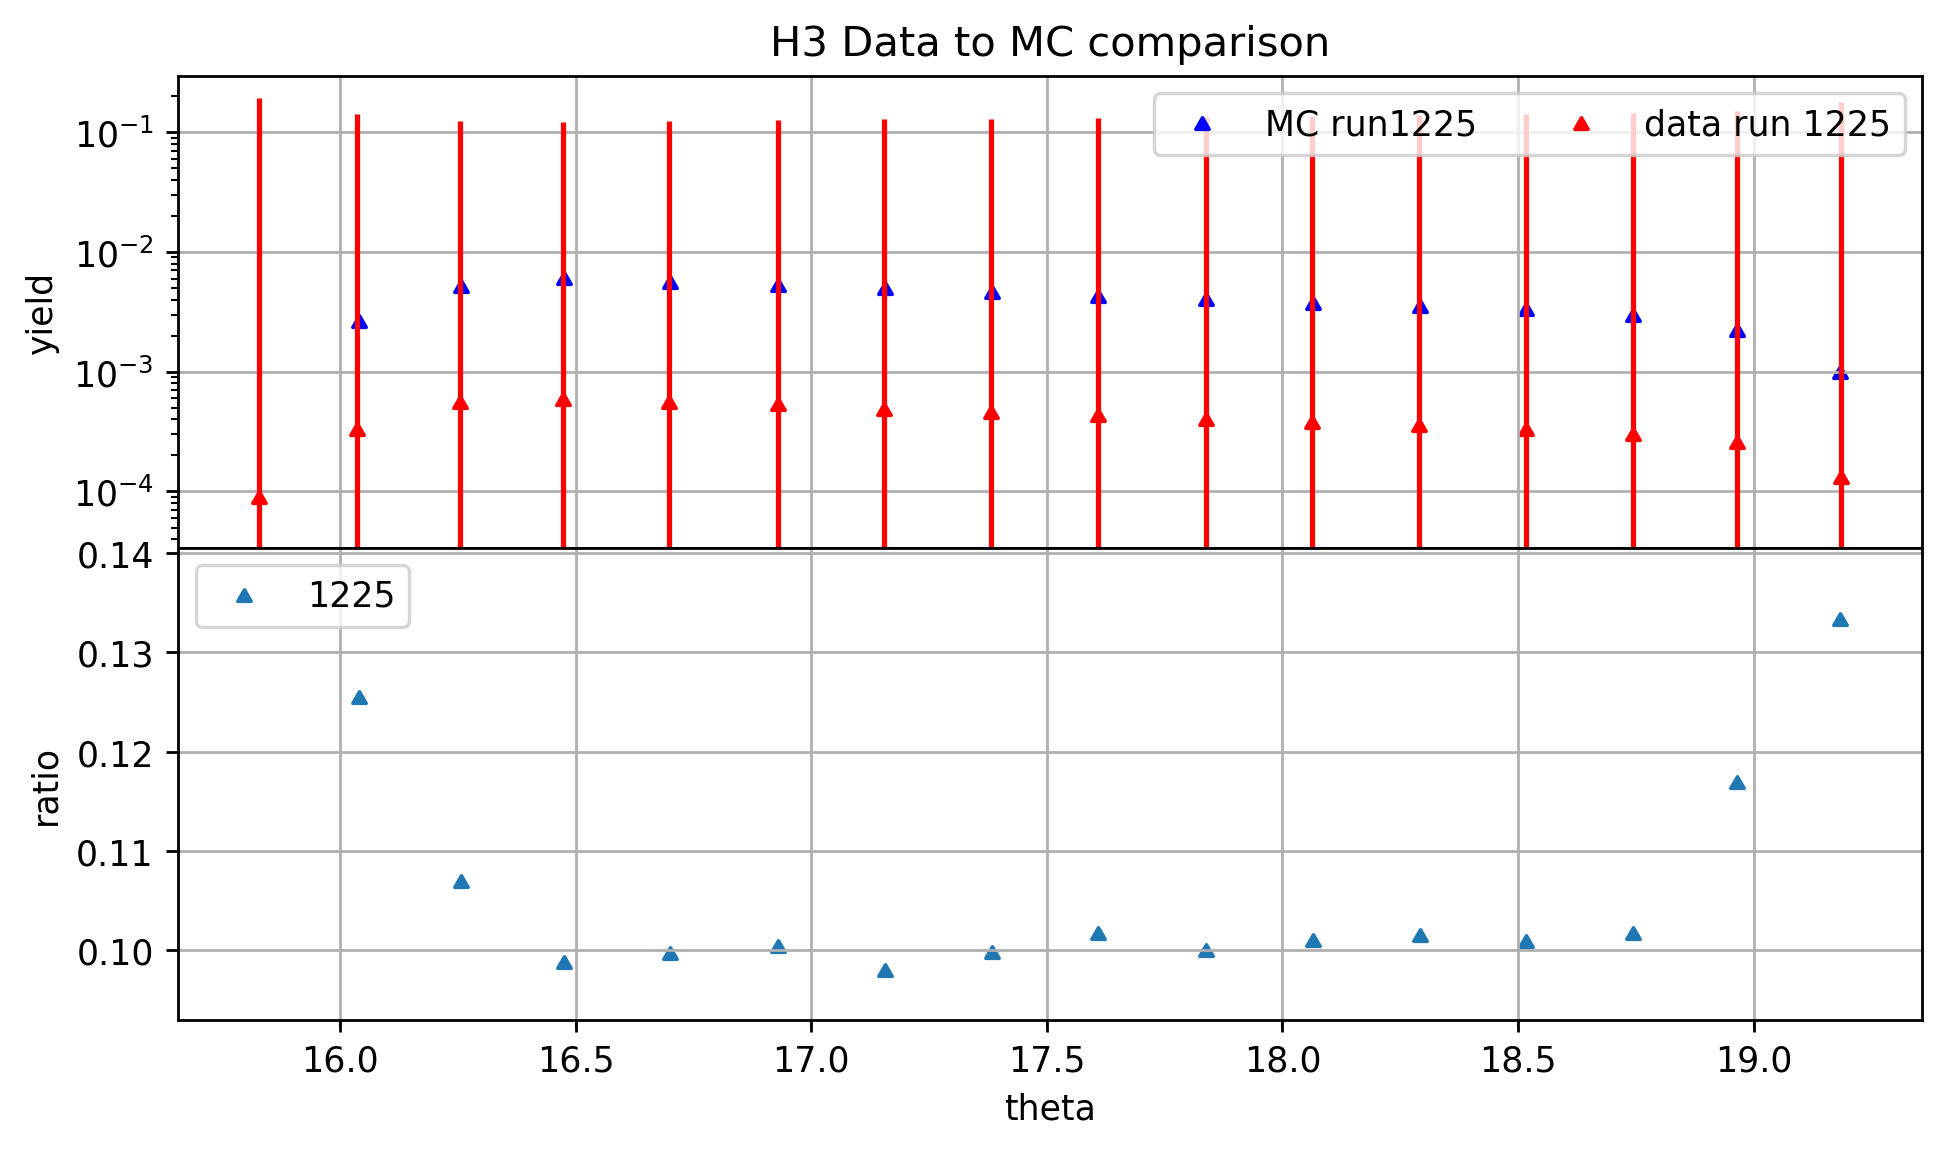

In [15]:
# %load phys_plot.py
# %load phys_plot.py
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np
import SQLRuns as SQL
tgt='H3'
kin="1"
suf="1"

rl =SQL.SQLRuns(tgt,kin,suf)


#print(rl)


runs=rl
goodruns={}
#runs=[1289, 1313, 1322, 1323, 1326, 1327]#, 1328]
#runs=[1283,1284,1285, 1297, 1298,1299]#, 2426, 2447, 2448]
#runs=[1210,1236,1238,1282,1347]
#runs=[1207,1233,1279,2570,1344,2632]
#if len(sys.argv) >1:
#    for i in range(1,len(sys.argv),1):
#        runs.append(sys.argv[i])
#else :
#    print('Please enter the runs you want to look at! -1 when done')
#    run=0
#    i=0
#    while run is not -1:
#        i=i+1
#        run=int(input("{}  ".format(i)))
#        if run==-1:
#            break
#        runs.append(run)       
print( "Will look at runs ", runs)
mcfile='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/byrun/'
datafile='/home/jbane/tritium/Tri_offline/yield/yield_output/byrun/'

mcDF={}
dataDF={}
mcDFs={}
dataDFs={}
ratios={}
i=0
n=0

runs=[1225]

for n in range(len(runs)):
    
    run = runs[n]
    
    mcfileR=mcfile+'{}.dat'.format(run)
    datafileR=datafile+'{}.dat'.format(run)
    
    chk1=0
    chk=0
    if os.path.isfile(mcfileR):
        chk=1
    else:
        ("MC run {} file does not exist".format(run)) 
        chk=0
    if os.path.isfile(datafileR):
        chk1=1
    else :
        print("run {} Data file does not exist".format(run))
        chk1=0
    if chk==0 or chk1==0:
        continue     

    #print(mcfileR)
    #print(datafileR)
        
    mcDF[i]=pd.read_table(mcfileR,delim_whitespace=True)
    dataDF[i]=pd.read_table(datafileR,delim_whitespace=True)
    print(run, len(mcDF[i]), len(dataDF[i]))
    
    #print(dataDF[i])
    #print(mcDF[i])
    
    
    mcmed=mcDF[i]['yield'].mean()
    datamed=dataDF[i]['yield'].mean()
    mcDFs[i]=mcDF[i][mcDF[i]['yield'] >=datamed *0.25]
    dataDFs[i]=dataDF[i][dataDF[i]['yield'] >= datamed *0.25]
    mcDFs[i]=mcDFs[i].dropna()
    dataDFs[i]=dataDFs[i].dropna()
    #dataDFs[i]= dataDFs[i].drop(dataDFs[i].index[[0,len(dataDFs[i])-1]])
    #mcDFs[i]=     mcDFs[i].drop(mcDFs[i].index[  [0,  len(mcDFs[i])-1]])
    
    #if len(dataDF[i]) ==0 or len(mcDF[i]) ==0:
    #       continue
    

    
    mean=dataDFs[i][":Ne"].mean()
    meanmc=mcDFs[i][":Ne"].mean()
    mcDFs[i]=mcDFs[i][ mcDFs[i][':Ne']>=0.2*meanmc]
    dataDFs[i]=dataDFs[i][ dataDFs[i][':Ne']>=0.2*mean]

    print(dataDFs[i])
    print(mcDFs[i])
    
    ratios[i] = mcDFs[i].copy()
    #ratios[i].drop('yield')
    ratios[i]['data_Y'] =dataDFs[i]['yield']
    ratios[i]['MC_Y'] = mcDFs[i]['yield']
    ratios[i]['ratio'] = dataDFs[i]['yield']/mcDFs[i]['yield']
    ratios[i]['offset'] = dataDFs[i]['theta'] - mcDFs[i]['theta']
    
    
    ratios[i]=ratios[i][ mcDFs[i][':Ne']>=0.2*meanmc]
    print(ratios[i])
    
 #   print(i,run, len(mcDFs[i]), len(dataDFs[i]),len(ratios[i]))
    
    
    goodruns[i]=run
    i=i+1
##############end of first loop

import matplotlib._color_data as mcd
overlap = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]

markers =[[3,0,0]  ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0] ,[4,1,0],[3,0,0]]
markers2 =[[3,0,0] ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,70],[4,1,0],[3,0,0]]
colors=['red', 'Green', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta','Teal','Brown','Maroon','Mint','Navy']#, f032e6, bcf60c, fabebe, 008080, e6beff, 9A6324, fffac8, 800000, aaffc3, 808000, ffd8b1, 000075, a9a9a9, ffffff, 000000]
fig= plt.figure(dpi=250,figsize=(9, 5))
ax=fig.add_subplot(2,1,1)
plt.title('{} Data to MC comparison'.format(tgt))
bx=fig.add_subplot(2,1,2, sharex=ax)

#print(len(ratios))

#fig,bx=plt.subplots(dpi=250)
k=int(0)
for j in range(len(ratios)):
    xkcd = mcd.XKCD_COLORS["xkcd:" + overlap[j]].upper()
    xkcd2 = mcd.XKCD_COLORS["xkcd:" + overlap[j+len(mcDF)]].upper()
    #print(j , runs[j])
    if k == 7:
        k = 0
    if len(ratios[j]) == 0:
        continue
    #if j == 110:
     #   ax = mcDFs[j].plot(x='theta',y='yield',yerr=':error',kind='scatter', marker=markers[j], color='blue', label='MC run{}'.format(runs[j]))
    #else :
    
    mcDFs[j].plot(ax=ax,x='theta',y='yield',yerr=':error',kind='scatter',marker=markers[k], color='blue', label='MC run{}'.format(goodruns[j]))    
    dataDFs[j].plot(ax=ax,x='theta',y='yield',yerr=':error',kind='scatter', marker=markers2[k], color='red', label='data run {}'.format(goodruns[j]))
    ratios[j].plot(ax=bx,x='theta' ,y='ratio', xerr='offset', kind='scatter', label='{}'.format(goodruns[j]),marker=markers2[k] )
    k=k+1
    print(j,runs[j], ratios[j]['ratio'].mean())    
ax.set_yscale("log")
ax.grid(True)
bx.grid(True)
ax.legend(ncol=2)
bx.legend(ncol=2)


fig.subplots_adjust(hspace=0)

In [ ]:
tgt='H3'
kin="1"


##########################################
H3  = ["Tritium" ,"T", "T3", "H3" ]
D2  = ["Deuterium","D2", "D", "H2" ]
H   = ["Hydrogen","H1", "H" ]
He3 = ["Helium-3","Helium","He3"]
if tgt in H3 :
     TGT = H3[0]
if tgt in D2 :
     TGT = D2[0]
if tgt in H :
     TGT = H[0]
if tgt in He3 :
     TGT = He3[0]

tgt=TGT
#########################################        

#############
import mysql.connector
db_user= 'triton-user'
db_pswd= '3He3Hdata'
db_name= 'triton-work'
db_host= 'halladb'
cnx = mysql.connector.connect(user=db_user,host=db_host,database=db_name, password=db_pswd)
cursor = cnx.cursor(buffered=True)
query1 = 'select run_number from MARATHONrunlist where (Kinematic = "{}" or Kinematic like "{}[_]") and target="{}" order by run_number asc'.format(kin,kin,tgt)
query = 'select run_number from MARATHONrunlist where Kinematic = "{}" and target="{}" order by run_number asc'.format(kin,tgt)
cursor.execute(query)
results= cursor.fetchall()
rl={}
print(results)
for i,row in enumerate(results):
         rl[i]=(row[0])
####################

In [ ]:


##########################################
H3  = ["Tritium" ,"T", "T3", "H3" ]
D2  = ["Deuterium","D2", "D", "H2" ]
H   = ["Hydrogen","H1", "H" ]
He3 = ["Helium-3","Helium","He3"]
if tgt in H3 :
     TGT = H3[0]
if tgt in D2 :
     TGT = D2[0]
if tgt in H :
     TGT = H[0]
if tgt in He3 :
     TGT = He3[0]

tgt=TGT
#########################################        
if suf != '%':
    suf = suf + '%'
#############
import mysql.connector
db_user= 'triton-user'
db_pswd= '3He3Hdata'
db_name= 'triton-work'
db_host= 'halladb'
cnx = mysql.connector.connect(user=db_user,host=db_host,database=db_name, password=db_pswd)
cursor = cnx.cursor(buffered=True)
query1 = 'select run_number from MARATHONrunlist where (Kinematic like "{}/_{}" ESCAPE "/" ) and target="{}" order by run_number asc'.format(kin,suf,tgt)

print(query1)

query = 'select run_number from MARATHONrunlist where Kinematic = "{}" and target="{}" order by run_number asc'.format(kin,kin,tgt)
cursor.execute(query1)
results= cursor.fetchall()
rl={}
for i,row in enumerate(results):
         rl[i]=(row[0])
####################
